# K-Means Clustering Algorithm

K-Means is an unsupervised machine learning algorithm used for clustering data into groups or clusters based on similarity. It aims to partition the data points into K clusters, where each point belongs to the cluster with the nearest mean. The algorithm iteratively refines cluster assignments until convergence.

## Mathematical Formulation

Let's define the key components of the K-Means algorithm:

- $K$: The number of clusters to create.
- $X$: The dataset with $N$ data points, where each data point is $x_i$ in $d$-dimensional space, $x_i \in \mathbb{R}^d$.
- $C$: The set of $K$ cluster centroids, denoted as $C = \{c_1, c_2, \ldots, c_K\}$, where $c_k$ is the centroid of cluster $k$.
- $R$: The cluster assignment vector, where $r_i$ represents the cluster assignment for data point $x_i$, such that $r_i \in \{1, 2, \ldots, K\}$.
- $J$: The objective function, which is the sum of squared distances from each point to its assigned centroid:

  $$J = \sum_{i=1}^{N} \sum_{k=1}^{K} \left\| x_i - c_k \right\|^2 \cdot \mathbb{I}(r_i = k)$$

  Where $\mathbb{I}(r_i = k)$ is an indicator function that equals 1 if $r_i = k$ and 0 otherwise.

## K-Means Algorithm Steps

The K-Means algorithm follows these iterative steps:

1. **Initialization**: Initialize the cluster centroids $C$ either randomly or using the K-Means++ method.

2. **Assignment Step**: Assign each data point $x_i$ to the nearest cluster centroid $c_k$ by computing the Euclidean distance:

   $$r_i = \arg\min_k \left\| x_i - c_k \right\|^2$$

3. **Update Step**: Recalculate the cluster centroids $c_k$ by taking the mean of all data points assigned to cluster $k$:

   $$c_k = \frac{1}{|S_k|} \sum_{i \in S_k} x_i$$

   Where $S_k$ is the set of data points assigned to cluster $k$.

4. **Convergence Check**: Repeat the assignment and update steps until convergence. Convergence can be determined by checking if the cluster assignments $r_i$ no longer change or if the objective function $J$ becomes stable.

## K-Means++ Initialization

K-Means++ is an improved initialization method that aims to distribute the initial cluster centroids more effectively. The steps for K-Means++ initialization are as follows:

1. Select the first centroid $c_1$ uniformly at random from the dataset $X$.

2. For each subsequent centroid $c_k$, choose the next data point $x_i$ as the centroid with a probability proportional to the squared distance from $x_i$ to the nearest existing centroid $c_j$. In other words, select $x_i$ with probability $\frac{d(x_i, c_j)^2}{\sum_{j} d(x_i, c_j)^2}$, where $d(x_i, c_j)$ is the Euclidean distance.

3. Repeat step 2 until $K$ centroids are chosen.

K-Means++ initialization often leads to faster convergence and better clustering results compared to purely random initialization.

K-Means is widely used for clustering tasks and has applications in various fields, including image compression, customer segmentation, and data analysis.


### Selecting Number of Clusters

## Selecting the Number of Clusters in K-Means

The choice of the number of clusters ($K$) in K-Means clustering is a critical decision for the effectiveness of the algorithm. Two common methods for determining $K$ are the Elbow Method and the Silhouette Score.

### 1. Elbow Method

The Elbow Method aims to find the optimal $K$ by examining the trade-off between the sum of squared distances (inertia) of each point to its assigned cluster centroid and the number of clusters. Mathematically, the inertia ($I$) for $K$ clusters is calculated as:

$$ I(K) = \sum_{i=1}^{n} \min_{j=1}^{K} ||x_i - \mu_j||^2 $$

where $n$ is the number of data points, $K$ is the number of clusters, $x_i$ is a data point, and $\mu_j$ is the centroid of cluster $j$. The Elbow Method involves plotting $I(K)$ against different values of $K$ and identifying the "elbow" point, representing the optimal $K$.

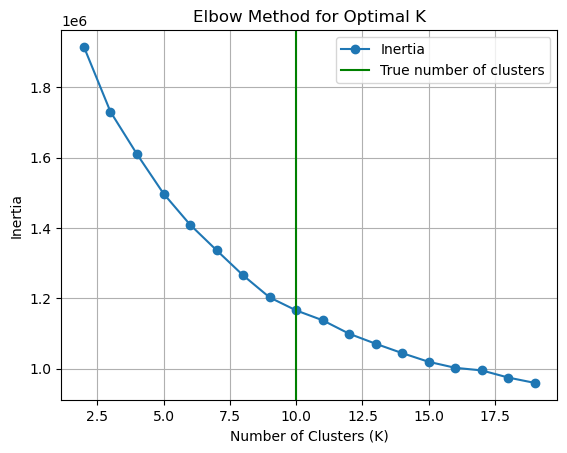

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits



# Generate synthetic data with three clusters
centers = 13
data, _ = make_blobs(n_samples=1000, centers=centers, random_state=42, cluster_std=0.3)


# Load the MNIST dataset
digits= load_digits()
data = digits.data 
centers = 10

# Instantiate KMeans with different values of K
inertia = []
for k in range(2, centers+10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


# Plot the Elbow curve
xs = list(range(2, len(inertia)+2))
plt.plot(xs, inertia, marker='o', label='Inertia')
plt.axvline(centers, color='g', label='True number of clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid()
plt.show()

### 2. Silhouette Score

The Silhouette Score quantifies the cohesion and separation of clusters. For each data point $i$, the Silhouette Score ($S(i)$) is given by:

$$ S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} $$

where $a(i)$ is the average distance from the $i$-th data point to other points in the same cluster, and $b(i)$ is the smallest average distance from the $i$-th data point to points in a different cluster. The overall Silhouette Score for the dataset is the average of individual Silhouette Scores.

Choosing the $K$ that maximizes the Silhouette Score leads to well-defined and separated clusters.

These methods provide a mathematical foundation for determining the optimal number of clusters in K-Means clustering.

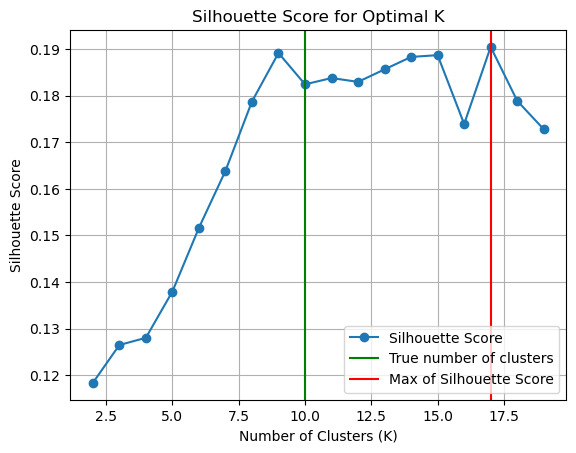

In [2]:
from sklearn.metrics import silhouette_score

# Instantiate KMeans with different values of K
sil_scores = []
for k in range(2, centers+10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(data)
    sil_scores.append(silhouette_score(data, labels))

# Plot Silhouette Scores
xs = list(range(2, len(inertia)+2))
plt.plot(xs, sil_scores, marker='o', label='Silhouette Score')
plt.axvline(centers, color='g', label='True number of clusters')
plt.axvline(xs[np.argmax(sil_scores)], color='r', label='Max of Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()
plt.legend()
plt.show()